In [1]:
import pandas as pd

In [43]:
data = pd.read_csv("data/bus/train.csv")
data

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

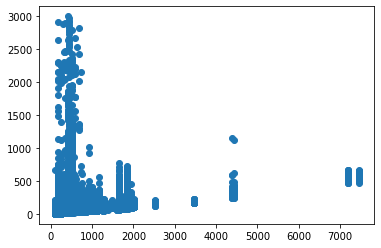

In [5]:
plt.scatter(data['distance'], data['next_arrive_time'])

In [7]:
plt.rc("font", family="Malgun Gothic")
# plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

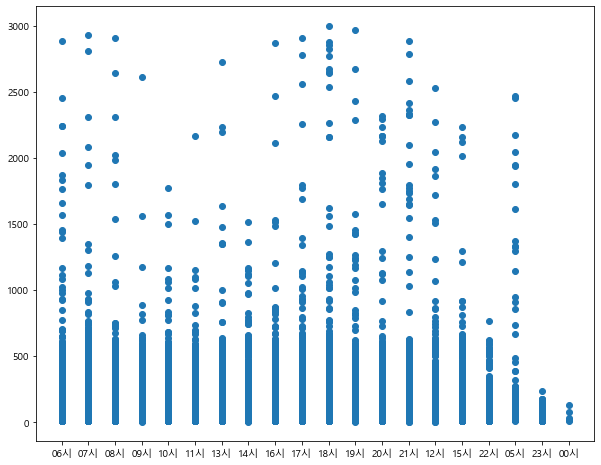

In [10]:
plt.figure(figsize = (10, 8))
plt.scatter(data['now_arrive_time'], data['next_arrive_time'])

In [11]:
data.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


In [12]:
data.shape

(210457, 14)

In [13]:
data.nunique()

id                  210457
date                    14
route_id                21
vh_id                  104
route_nm                21
now_latitude           562
now_longitude          567
now_station            348
now_arrive_time         20
distance               414
next_station           351
next_latitude          564
next_longitude         569
next_arrive_time       596
dtype: int64

In [15]:
data['vh_id'].nunique()

104

In [16]:
data['route_nm'].unique()

array(['360-1', '360-2', '360-7', '360-12', '365-21', '365-22', '201-11',
       '201-12', '201-13', '201-14', '201-15', '201-16', '201-17',
       '201-18', '201-21', '201-22', '201-24', '201-26', '201-27',
       '281-1', '281-2'], dtype=object)

In [17]:
data['now_arrive_time'].unique()

array(['06시', '07시', '08시', '09시', '10시', '11시', '13시', '14시', '16시',
       '17시', '18시', '19시', '20시', '21시', '12시', '15시', '22시', '05시',
       '23시', '00시'], dtype=object)

In [89]:
dt = data.loc[data['next_arrive_time']][["route_nm", "vh_id", "now_station", "now_arrive_time", 
                                    "distance", "next_station", "next_arrive_time"]].sort_values(by = "next_arrive_time")
dt.tail(30)

,route_nm,vh_id,now_station,now_arrive_time,distance,next_station,next_arrive_time
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
74,360-1,7997025,남녕고등학교,14시,322.0,한라병원,232
1428,360-1,7997118,노형오거리,06시,252.0,남녕고등학교,244
1234,360-1,7997064,연동대림1차아파트,18시,550.0,케이티앤지,246


In [34]:
dt["speed"] = (dt['distance'] * 1000) / (dt['next_arrive_time'] / 60 / 60) 
dt

,route_nm,vh_id,now_station,now_arrive_time,distance,next_station,next_arrive_time,speed
412,360-1,7997035,케이티앤지,11시,199.0,롯데마트,18,3.980000e+07
412,360-1,7997035,케이티앤지,11시,199.0,롯데마트,18,3.980000e+07
412,360-1,7997035,케이티앤지,11시,199.0,롯데마트,18,3.980000e+07
412,360-1,7997035,케이티앤지,11시,199.0,롯데마트,18,3.980000e+07
412,360-1,7997035,케이티앤지,11시,199.0,롯데마트,18,3.980000e+07
...,...,...,...,...,...,...,...,...
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
2674,360-12,7997028,월랑마을 남녕고등학교,14시,459.0,원노형,294,5.620408e+06


In [38]:
dt.sort_values(by = ["distance", "speed"])

,route_nm,vh_id,now_station,now_arrive_time,distance,next_station,next_arrive_time,speed
2582,360-12,7997028,광양사거리,07시,140.0,탐라장애인 종합복지관,36,1.400000e+07
2784,360-12,7997033,탐라장애인 종합복지관,09시,165.0,홍랑로입구,20,2.970000e+07
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
...,...,...,...,...,...,...,...,...
590,360-1,7997040,연동입구,09시,753.0,오라3동,62,4.372258e+07
590,360-1,7997040,연동입구,09시,753.0,오라3동,62,4.372258e+07
590,360-1,7997040,연동입구,09시,753.0,오라3동,62,4.372258e+07
2022,360-2,7997082,명신마을,19시,756.0,연동입구,194,1.402887e+07


In [32]:
dt['next_arrive_time'] / 60 / 60

412     0.005000
412     0.005000
412     0.005000
412     0.005000
412     0.005000
          ...   
580     0.073889
580     0.073889
580     0.073889
2674    0.081667
2326    0.127222
Name: next_arrive_time, Length: 210457, dtype: float64

In [41]:
sns.
dt.loc[dt["now_arrive_time"] == "09시"]

Object `sns.hist` not found.


,route_nm,vh_id,now_station,now_arrive_time,distance,next_station,next_arrive_time,speed
2784,360-12,7997033,탐라장애인 종합복지관,09시,165.0,홍랑로입구,20,2.970000e+07
1126,360-1,7997064,케이티앤지,09시,199.0,롯데마트,28,2.558571e+07
404,360-1,7997035,제대마을,09시,333.0,제대아파트,30,3.996000e+07
404,360-1,7997035,제대마을,09시,333.0,제대아파트,30,3.996000e+07
404,360-1,7997035,제대마을,09시,333.0,제대아파트,30,3.996000e+07
...,...,...,...,...,...,...,...,...
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06
580,360-1,7997040,원노형,09시,185.0,노형오거리,266,2.503759e+06


In [47]:
data.loc[data["route_nm"] == "360-1"]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197668,197668,2019-10-28,405136001,7997124,360-1,33.485822,126.490897,은남동,21시,267.0,제원아파트,33.487531,126.489892,44
197669,197669,2019-10-28,405136001,7997124,360-1,33.476260,126.481417,제주고등학교/중흥S클래스,21시,244.0,부영아파트,33.476900,126.483133,86
197670,197670,2019-10-28,405136001,7997124,360-1,33.478850,126.488350,대림2차아파트,21시,334.0,연동대림1차아파트,33.480700,126.489933,50
197671,197671,2019-10-28,405136001,7997124,360-1,33.487317,126.496617,연동주민센터,22시,455.0,제주도청 신제주로터리,33.491433,126.496783,58


In [46]:
data.loc[data["route_nm"] == "360-2"]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
1781,1781,2019-10-15,405136002,7997043,360-2,33.498925,126.530351,제주시청(광양방면),06시,447.0,고산동산(광양방면),33.495540,126.532907,40
1782,1782,2019-10-15,405136002,7997043,360-2,33.495540,126.532907,고산동산(광양방면),06시,272.0,제주지방법원(광양방면),33.493625,126.534764,80
1783,1783,2019-10-15,405136002,7997043,360-2,33.485199,126.542896,제주여자중고등학교(광양방면),06시,633.0,남국원(광양방면),33.479570,126.543882,72
1784,1784,2019-10-15,405136002,7997043,360-2,33.457848,126.553938,제대마을,07시,334.0,제대아파트,33.458900,126.557300,30
1785,1785,2019-10-15,405136002,7997043,360-2,33.458900,126.557300,제대아파트,07시,435.0,제주대학교,33.460114,126.561659,2082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198222,198222,2019-10-28,405136002,7997123,360-2,33.498925,126.530351,제주시청(광양방면),06시,418.0,광양사거리,33.500473,126.527103,112
198223,198223,2019-10-28,405136002,7997123,360-2,33.499916,126.521348,용천마을,06시,304.0,한국병원,33.500054,126.518076,58
198224,198224,2019-10-28,405136002,7997123,360-2,33.500033,126.504650,오라오거리,06시,157.0,명신마을,33.499623,126.503028,20
198225,198225,2019-10-28,405136002,7997123,360-2,33.488147,126.496363,연동주민센터,06시,404.0,도호동,33.485810,126.495011,98


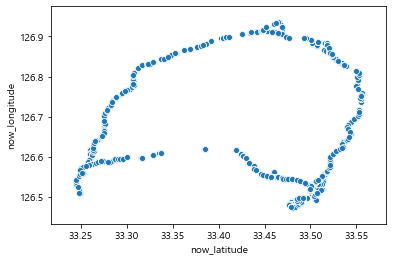

In [49]:
sns.scatterplot(data = data.loc[data["route_nm"] == "360-1"], x = data['now_latitude'], y = data['now_longitude'])

In [51]:
scatter = data[["route_nm", "now_latitude", "now_longitude", "now_station", "next_station"]]

In [104]:
scatter = scatter.drop_duplicates()
scatter = scatter.reset_index(drop = True)
scatter

,route_nm,now_latitude,now_longitude,now_station,next_station
0,360-1,33.456267,126.551750,제주대학교입구,제대마을
1,360-1,33.457724,126.554014,제대마을,제대아파트
2,360-1,33.458783,126.557353,제대아파트,제주대학교
3,360-1,33.479705,126.543811,남국원(아라방면),제주여자중고등학교(아라방면)
4,360-1,33.485662,126.494923,도호동,은남동
...,...,...,...,...,...
4008,201-15,33.344417,126.848850,신천리,신천리취락구조
4009,201-15,33.348483,126.853950,신천리취락구조,고망난돌입구
4010,201-17,33.521183,126.580417,삼양2동,화북주공아파트
4011,201-17,33.293583,126.757833,태흥3리사무소,태흥3리


In [114]:
scatter['route_nm'].unique()[1]

'360-2'

In [116]:
color = []

Object `color` not found.


In [118]:
import matplotlib
matplotlib.colors

<module 'matplotlib.colors' from 'C:\\Users\\HJ\\anaconda3\\lib\\site-packages\\matplotlib\\colors.py'>

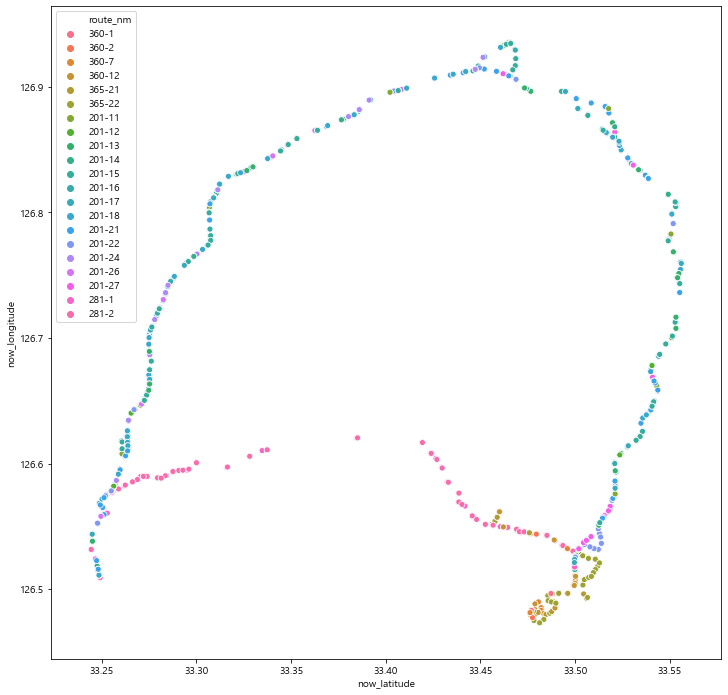

In [60]:
plt.figure(figsize = (12, 12))
sns.scatterplot(data = scatter, x = 'now_latitude', y = 'now_longitude', hue = 'route_nm')

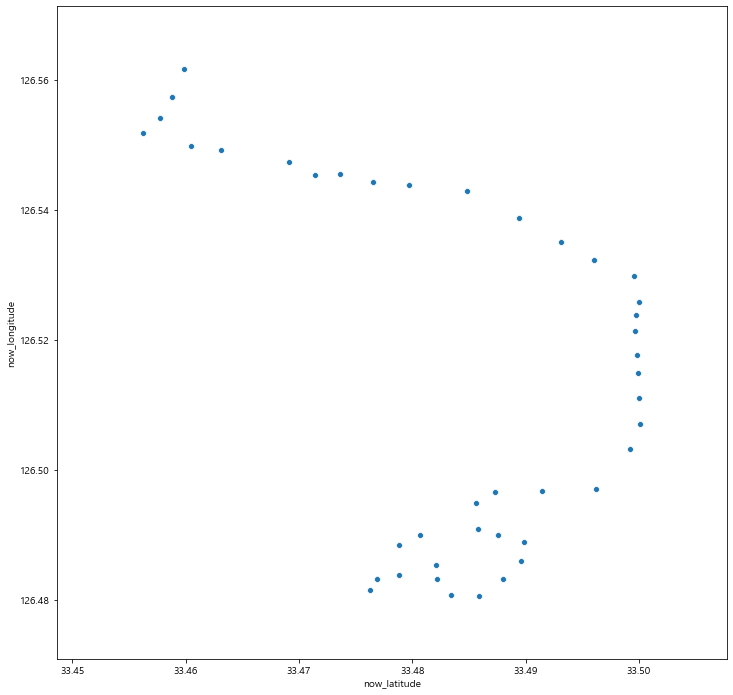

In [59]:
plt.figure(figsize = (12, 12))
sns.scatterplot(data = scatter.loc[scatter['route_nm'] == '360-1'], x = 'now_latitude', y = 'now_longitude')

In [61]:
import folium

In [73]:
m = folium.Map(location = ['33.3617', '126.5292'], 
               zoom_start = 10.5)
m

In [120]:
from folium.plugins import MiniMap, MarkerCluster

In [ ]:
marker_cluster = MarkerCluster()
m_cluster = marker_cluster.add_to(m)

In [111]:
m = folium.Map(location = ['33.3617', '126.5292'], 
               zoom_start = 10.5)

for i in scatter.index:
    lat = scatter['now_latitude'][i]
    long = scatter['now_longitude'][i]
    name = scatter['now_station'][i]
    route = scatter['route_nm'][i]

    folium.Marker(location = [lat, long],
                 tooltip = f'{name} : {route}').add_to(m)



m

In [88]:
for i in range(4013):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556


In [96]:
scatter['now_latitude'][0]

33.456267

In [105]:
for i in scatter.index:
    lat = scatter['now_latitude'][i]
    long = scatter['now_longitude'][i]
    name = scatter['now_station'][i]
    route = scatter['route_nm'][i]

print(lat, long, name, route)

33.429815000000005 126.596488 한라생태숲 281-2


In [106]:
scatter.index

RangeIndex(start=0, stop=4013, step=1)

In [121]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [122]:
data

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [124]:
data.

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

In [125]:
data2 = pd.read_csv("data/bus/test.csv")
data2

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,447.0,제주시청(광양방면),33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20시,418.0,광양사거리,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20시,140.0,탐라장애인 종합복지관,33.500228,126.525625


In [128]:
y_train = pd.DataFrame(data['next_arrive_time'])

In [130]:
X_train = data.drop(columns = 'next_arrive_time', axis = 1)
X_train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068


In [131]:
X_test = data2.copy()

In [132]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: '2019-10-15'

In [133]:
data

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [134]:
data.sort_values(by = 'next_arrive_time')

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
69268,69268,2019-10-19,405320112,7983095,201-12,33.515183,126.557067,오현중고등학교,21시,97.0,거로 입구,33.514637,126.556243,6
115127,115127,2019-10-22,405320112,7983095,201-12,33.515183,126.557067,오현중고등학교,12시,97.0,거로 입구,33.514637,126.556243,6
205488,205488,2019-10-28,405320116,7983225,201-16,33.515183,126.557067,오현중고등학교,14시,97.0,거로 입구,33.514637,126.556243,6
10128,10128,2019-10-15,405320116,7983073,201-16,33.515183,126.557067,오현중고등학교,19시,97.0,거로 입구,33.514637,126.556243,6
162746,162746,2019-10-25,405320116,7983093,201-16,33.515183,126.557067,오현중고등학교,09시,97.0,거로 입구,33.514637,126.556243,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2003,2019-10-15,405136002,7997082,360-2,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2906
150855,150855,2019-10-24,405328101,7983481,281-1,33.499793,126.517687,한국병원,08시,188.0,제주버스터미널(가상정류소),33.499888,126.515656,2906
110733,110733,2019-10-22,405136521,7997031,365-21,33.458900,126.557300,제대아파트,07시,435.0,제주대학교,33.460114,126.561659,2930
34404,34404,2019-10-17,405136012,7997041,360-12,33.460114,126.561659,제주대학교,19시,435.0,제대아파트,33.458900,126.557300,2966


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


In [138]:
type(data.date[1])

str

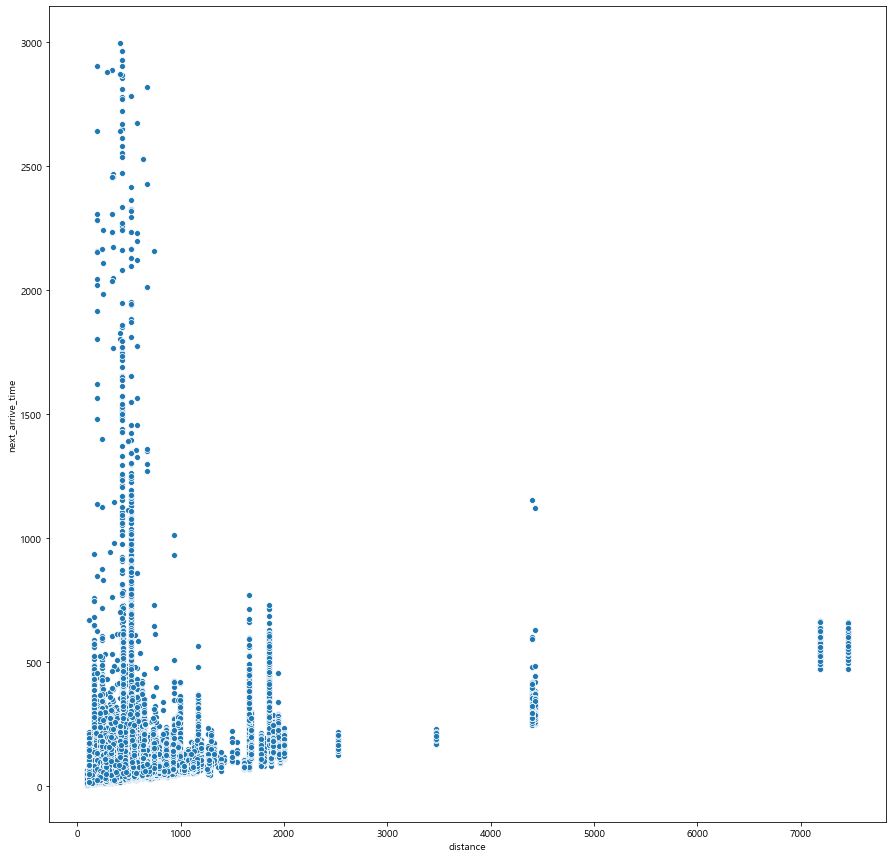

In [140]:
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, x = 'distance', y = 'next_arrive_time')

In [143]:
weekday_name = "월 화 수 목 금 토 일"
weekday_name = weekday_name.split()
weekday_name

['월', '화', '수', '목', '금', '토', '일']

In [144]:
data['day'] = data['date'].dt.dayofweek
data[['date', 'day']].head()

AttributeError: Can only use .dt accessor with datetimelike values

In [146]:
pd.datetime(data['date'])

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


TypeError: cannot convert the series to <class 'int'>